In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("survey lung cancer.csv")

In [3]:
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

<AxesSubplot: xlabel='LUNG_CANCER', ylabel='count'>

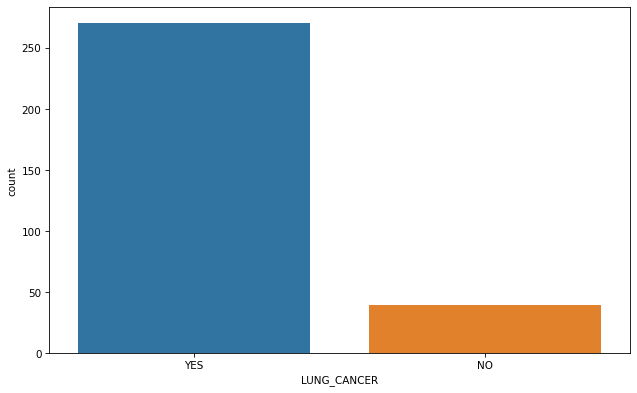

In [5]:
plt.figure(figsize=(10,6),dpi=75)
sns.countplot(x=df['LUNG_CANCER'])

<AxesSubplot: xlabel='SMOKING', ylabel='count'>

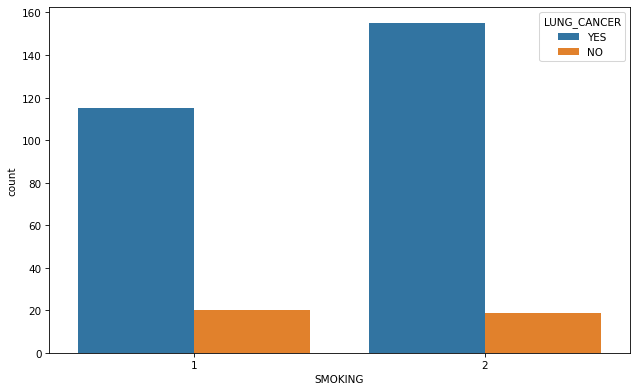

In [7]:
plt.figure(figsize=(10,6),dpi=75)
sns.countplot(x='SMOKING',hue='LUNG_CANCER',data=df)

<Figure size 1000x600 with 0 Axes>

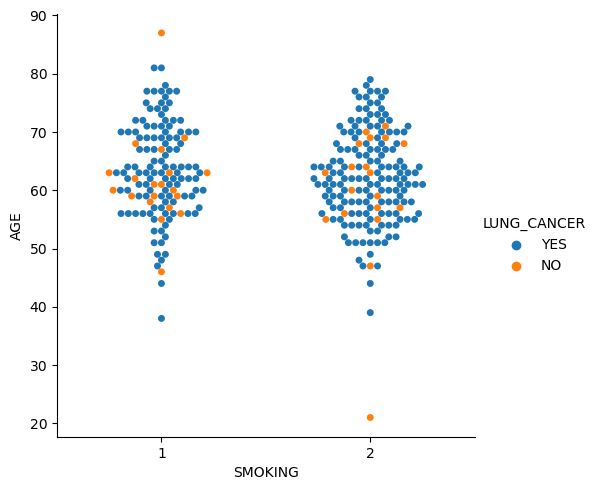

In [8]:
plt.figure(figsize=(10,6),dpi=100)
sns.catplot(data=df, kind="swarm", x="SMOKING", y="AGE", hue="LUNG_CANCER")

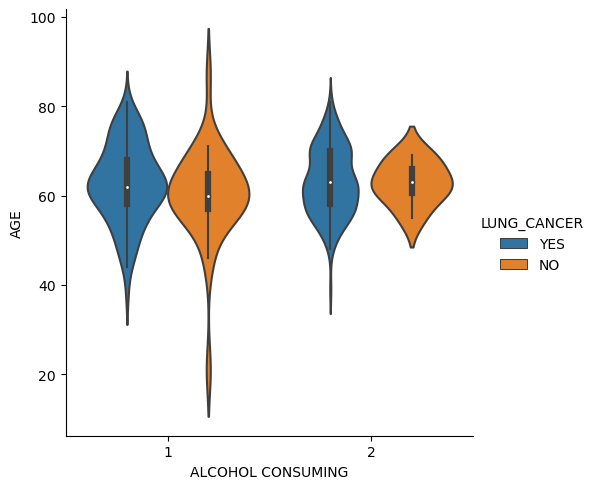

In [9]:
sns.catplot(data=df, kind="violin", x="ALCOHOL CONSUMING", y="AGE", hue="LUNG_CANCER")

<AxesSubplot: >

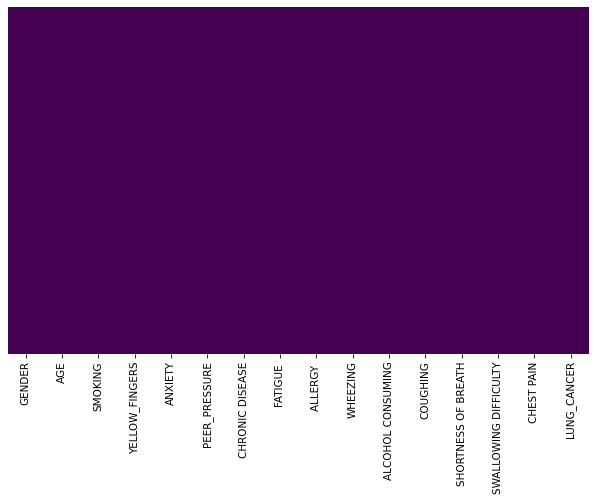

In [10]:
plt.figure(figsize=(10,6),dpi=75)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [11]:
gender = pd.get_dummies(df['GENDER'],drop_first=True)
gender

,M
0,1
1,1
2,0
3,1
4,0
...,...
304,0
305,1
306,1
307,1


In [12]:
df = df.drop('GENDER',axis=1)

In [13]:
lung_cancer = pd.get_dummies(df['LUNG_CANCER'],drop_first=1)

In [14]:
lung_cancer

,YES
0,1
1,1
2,0
3,0
4,0
...,...
304,1
305,1
306,1
307,1


In [15]:
df = df.drop('LUNG_CANCER',axis=1)

In [16]:
df=pd.concat([df,lung_cancer,gender],axis=1)

In [17]:
df.head(10)

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,YES,M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0
5,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1,0
6,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1,1
7,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1,0
8,68,2,1,2,1,1,2,1,1,1,1,1,1,1,0,0
9,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1,1


In [18]:
df.corr()['YES'].sort_values()

SMOKING                  0.058179
SHORTNESS OF BREATH      0.060738
M                        0.067254
AGE                      0.089465
CHRONIC DISEASE          0.110891
ANXIETY                  0.144947
FATIGUE                  0.150673
YELLOW_FINGERS           0.181339
PEER_PRESSURE            0.186388
CHEST PAIN               0.190451
COUGHING                 0.248570
WHEEZING                 0.249300
SWALLOWING DIFFICULTY    0.259730
ALCOHOL CONSUMING        0.288533
ALLERGY                  0.327766
YES                      1.000000
Name: YES, dtype: float64

In [19]:
X = df.drop('YES',axis=1)

In [20]:
y=df['YES']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [23]:
from sklearn.svm import SVC
svc=SVC()

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.01,0.1,0.5,1],'kernel':['linear','rbf','poly'],'gamma':['scale','auto']}

In [25]:
grid = GridSearchCV(svc,param_grid)

In [26]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [27]:
grid.best_params_

{'C': 0.01, 'gamma': 'auto', 'kernel': 'poly'}

In [28]:
grid_preds = grid.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [30]:
print(confusion_matrix(y_test,grid_preds))

[[ 4  1]
 [ 1 25]]


In [31]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.96      0.96      0.96        26

    accuracy                           0.94        31
   macro avg       0.88      0.88      0.88        31
weighted avg       0.94      0.94      0.94        31



In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [33]:
model = AdaBoostClassifier(n_estimators=1)

In [34]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [35]:
preds = model.predict(X_test)

In [36]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.84      0.91        31

    accuracy                           0.84        31
   macro avg       0.50      0.42      0.46        31
weighted avg       1.00      0.84      0.91        31



c:\Users\shrey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shrey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shrey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
error_rate=[]
for n in range(1,50):
  model = AdaBoostClassifier(n_estimators=n)
  model.fit(X_train,y_train)
  preds = model.predict(X_test)
  err = 1 -accuracy_score(y_test,preds)
  error_rate.append(err)

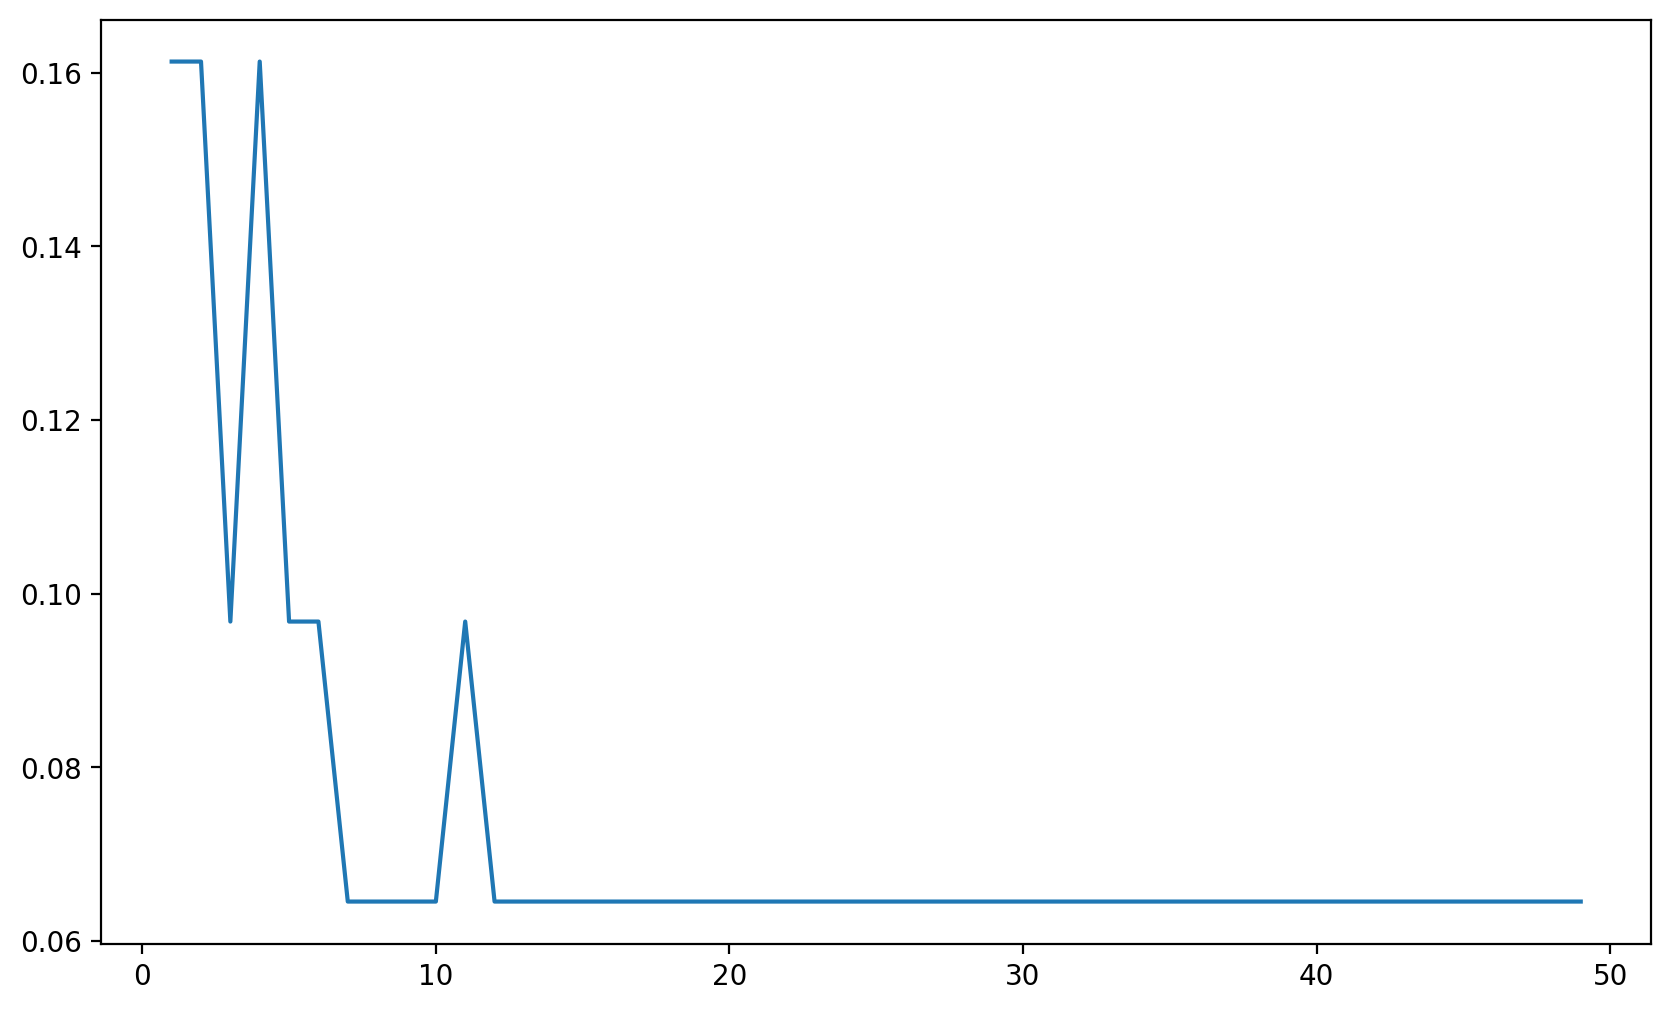

In [38]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(np.arange(1,50),error_rate)

In [39]:
model = AdaBoostClassifier(n_estimators=15)

In [40]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=15)

In [41]:
preds = model.predict(X_test)

In [42]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.96      0.96      0.96        26

    accuracy                           0.94        31
   macro avg       0.88      0.88      0.88        31
weighted avg       0.94      0.94      0.94        31



In [45]:
import pickle
pickle.dump(model,open('lung_cancer.pkl','wb'))